<h2>ANN for regression, example 1 - Household energy bill + optimization attemps</h2>

<b>Imports, check Moodle for module installations</b>

In [1]:
#%pip install tensorflow numpy pandas matplotlib seaborn scikit-learn

In [2]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

In [3]:
SEED = 42
tf.config.experimental.enable_op_determinism()
tf.random.set_seed(SEED)

<b>Load data into a DataFrame</b>

In [4]:
df = pd.read_csv("Household energy bill data.csv")

In [5]:
# quickly check the first few rows
df.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


<b>Create X and y</b>

In [6]:
# printing out the column names for easier copying for X/y
df.columns

Index(['num_rooms', 'num_people', 'housearea', 'is_ac', 'is_tv', 'is_flat',
       'ave_monthly_income', 'num_children', 'is_urban', 'amount_paid'],
      dtype='object')

In [7]:
# if you  have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
# in this case, everything else except the amount_paid
X = df[['num_rooms', 'num_people', 'housearea', 'is_ac', 'is_tv', 'is_flat',
       'ave_monthly_income', 'num_children', 'is_urban']]

# have only the target variable here (dependent variable)
# in this case, amount_paid => how big is the electricity bill
y = df['amount_paid']

<b>Train / test / validation -split</b>

In [8]:
# unfortunately the scikit-learn's train_test_split doesn't support validation
# set split in itself.
# if you want to split the test set into two for a validation set too, try this trick:

# first, train/test split => 70% for training, 30% for other purposes (temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# now, split the 30% for other purposes by 50% (resulting in 2 x 15%)
# so finally, we have:
# 70% for training
# 15% for testing
# 15% for validation
# => 70 + 15 +15 = 100%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [9]:
# just seeing how much data we have in each
print(f"Train data amount: {len(X_train)}")
print(f"Test data amount: {len(X_test)}")
print(f"Validation data amount: {len(X_val)}")

Train data amount: 700
Test data amount: 150
Validation data amount: 150


<b>Create neural network structure</b>

In [10]:
# save this info to a variable so we don't have to change this after
# changing the dataset
variable_amount = len(X.columns)

# Define Sequential neural network model
# modify the input shape to match your training column count
# remember, one of the columns is removed from training columns
# to be the target value. so if your data originally had 10 columns
# the input shape is 9 ... (10 - 1 => 9)
# the input layer itself can have a different number of nodes
# Tip: have at least the same number of nodes as in the input shape
# output layer in regression is always 1 node without activation function

# three most common alternatives for the regularizer
# kernel_regularizer=keras.regularizers.l1(l1=0.1)
# kernel_regularizer=keras.regularizers.l2(l2=0.1)
# kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.1)
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(10, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        #layers.Dropout(0.1),
        layers.Dense(6, activation="relu"),
        layers.Dense(1)
    ]
)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:

# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
model.summary()

/Users/kirillsobolev/Documents/GitHub/Deep-Learning/.venv/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 9)              │            36 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 18 (72.00 B)

<h3>Train the neural network model with our data</h3>

In [11]:
# fit the model, note also we are using the validation data
# for better metrics and optimization for the neural network
model.fit(x=X_train, y=y_train, epochs=1200, validation_data=(X_val, y_val))

Epoch 1/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 391082.4375 - val_loss: 376506.8750
Epoch 2/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 390665.1250 - val_loss: 376836.2188
Epoch 3/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 390141.7500 - val_loss: 376523.4062
Epoch 4/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 389466.4375 - val_loss: 375874.6250
Epoch 5/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 388592.4688 - val_loss: 374955.0938
Epoch 6/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 387477.2812 - val_loss: 373754.0625
Epoch 7/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 386063.5625 - val_loss: 372156.6250
Epoch 8/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 384260.5000 - val_loss: 370016.6250
Epoch 9/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 381940.0312 - val_loss: 367195.9375
Epoch 10/1200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 378937.3438 - val_loss: 363501.6562
Epoch 11/1200
22/22 ━━━━━━━━━━━━━━━

<h3>Training metrics</h3>

<Axes: >

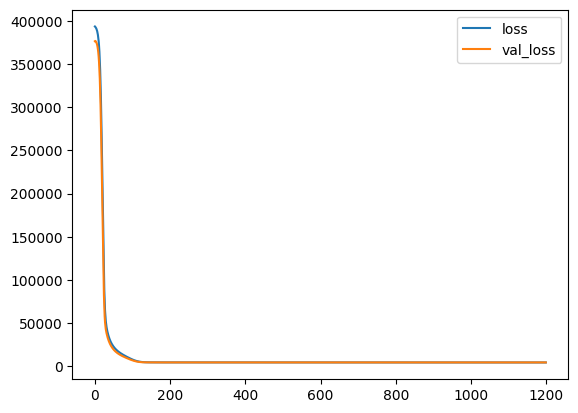

In [12]:
# the lines whould be as close to each other as possible
# implicating there's no under- or overfit
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [13]:
# compare test error values to training error values
# the model is often good when these error values are similar
# even if you training metrics above didn't overlap
# you might still get very close values in evaluation => more important

# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
4407.84228515625

Train data evaluation:
3752.08544921875


<h3>Make some test predictions to see what kind of mistakes the model makes</h3>

In [14]:
# we also need these test predictions in order
# to get some of the graphs and metrics later
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


,Test True Y,Model Predictions
0,529.752567,608.462524
1,725.970313,707.413818
2,742.379815,809.567871
3,675.483254,694.090698
4,485.738650,463.862030
...,...,...
145,439.728088,445.950897
146,800.416867,804.908691
147,562.955168,586.295044
148,473.820453,540.103760


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

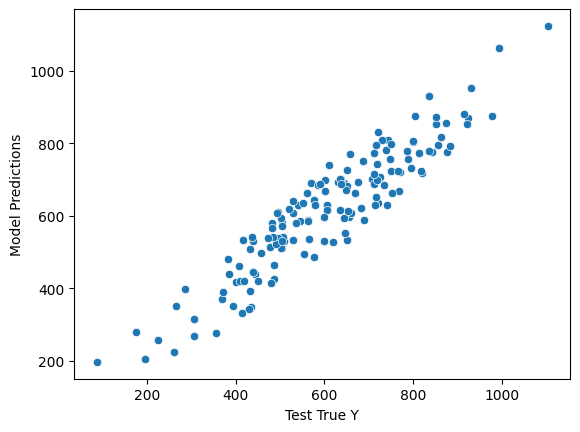

In [15]:
# these values follow a linear line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

<h3>Regression error metrics</h3>

In [16]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
56.83 $

MSE
4401.1 $^2

RMSE:
66.34 $

R-squared:
0.86

Explained variance score:
0.87


/var/folders/19/0ldx1bc54jx5tvjkrsbcv4040000gn/T/ipykernel_67540/3124900743.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


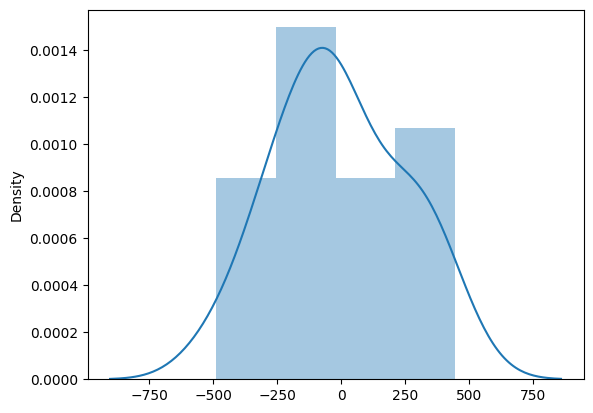

In [17]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

<h2>Lets' try the model in practice</h2>

In [18]:
X.columns

Index(['num_rooms', 'num_people', 'housearea', 'is_ac', 'is_tv', 'is_flat',
       'ave_monthly_income', 'num_children', 'is_urban'],
      dtype='object')

In [19]:
df.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


In [20]:
# let's try with some new imaginary data
# this example uses the student performance index score dataset
# modify this as needed regarding your own dataset
tester_row = {
    'num_rooms': 4, 
    'num_people': 3, 
    'housearea': 845, 
    'is_ac': 1, 
    'is_tv': 1, 
    'is_flat': 0,
    'ave_monthly_income': 12000, 
    'num_children': 1, 
    'is_urban': 1
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [21]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated electricity bill with this household:")
print(f"{round(float(result[0]), 2)} $")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

Estimated electricity bill with this household:
762.12 $
----------------
